In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [2]:
X,y = make_regression(n_samples=1000, n_features=8, n_informative=1,noise=10,random_state=1)

X.shape, y.shape

((1000, 8), (1000,))

In [3]:
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7
0,2.234722,-0.134249,0.423003,0.046846,-0.185811,-1.787738,-0.438055,0.290788
1,0.532064,-0.036220,-0.360056,1.122365,-0.236285,-1.483654,1.970293,0.591212
2,0.597946,-2.076691,0.640464,-0.584668,0.541948,0.320536,0.585493,0.592993
3,-0.564872,-0.510603,0.644545,0.294419,2.192959,-0.357765,1.027627,-0.805408
4,1.362797,-0.311720,-0.210229,-0.581775,-1.226492,0.957538,-0.906642,-0.089283
...,...,...,...,...,...,...,...,...
995,1.618226,-1.119273,1.428692,-1.462844,1.222940,-2.156295,-0.494417,-0.620102
996,-0.251674,1.409253,0.636583,0.382715,-0.806185,1.620912,-0.391816,-0.288997
997,2.215843,-0.740963,-0.453105,0.826477,1.072931,0.136104,-1.427016,-0.961364
998,-1.033310,0.992711,0.254970,-0.187095,-0.531280,1.069917,0.680776,1.896016


In [4]:
df.describe()

,0,1,2,3,4,5,6,7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.003916,-0.035525,0.051359,-0.038292,0.031903,0.059821,0.024484,-0.041748
std,1.052536,0.982364,1.000371,0.976799,1.005113,0.993466,1.003519,0.973628
min,-3.064141,-3.016032,-3.294858,-2.790996,-3.190616,-2.872050,-3.153357,-2.984836
25%,-0.700934,-0.720224,-0.583251,-0.681221,-0.630374,-0.608130,-0.655885,-0.700274
50%,-0.036871,-0.046502,0.099387,-0.055306,0.044438,0.080484,0.029715,-0.047788
75%,0.677896,0.573496,0.689411,0.645226,0.696570,0.712258,0.699650,0.587767
max,3.404302,3.432663,3.238343,3.958603,4.026849,3.118480,2.893593,3.135047


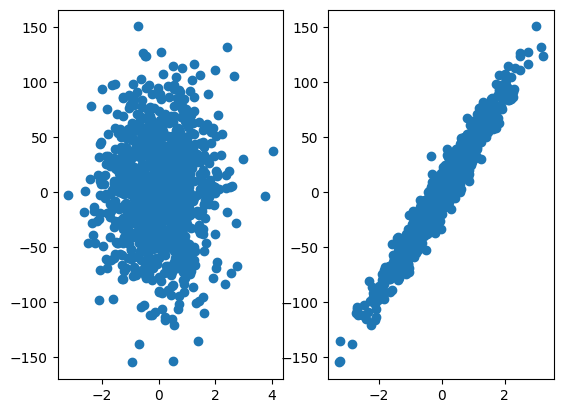

In [5]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.scatter(X[:,4],y)

plt.subplot(1,2,2)
plt.scatter(X[:,2],y)


In [6]:
X.shape, y.shape

((1000, 8), (1000,))

In [7]:
ones = np.ones((X.shape[0],1))
df = pd.DataFrame(X)
df.insert(0,'0',value=ones)
df
X=df.values
X

array([[ 1.        ,  2.23472174, -0.13424856, ..., -1.78773771,
        -0.43805451,  0.29078795],
       [ 1.        ,  0.53206401, -0.03622003, ..., -1.48365447,
         1.97029256,  0.59121169],
       [ 1.        ,  0.59794564, -2.07669128, ...,  0.32053559,
         0.58549275,  0.59299291],
       ...,
       [ 1.        ,  2.21584334, -0.74096334, ...,  0.13610446,
        -1.42701563, -0.9613638 ],
       [ 1.        , -1.03330964,  0.99271079, ...,  1.06991674,
         0.68077642,  1.89601571],
       [ 1.        , -0.81629265, -1.14141636, ...,  2.09581941,
         1.12470319, -1.44585088]])

In [8]:
X.shape

(1000, 9)

In [9]:
def hypothesis(x,theta):
    y_ = 0.0
    m = x.shape[0]
    
    for i in range(m):
        y_ += theta[i]*x[i]
    
    return y_

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        e += (y_ - y[i])**2
        
    return e/m

        
def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    
    return grad/m

def gradient_descent(X,y,max_steps=100,learning_rate=0.1):
    
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_steps):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
    
    return theta, error_list

In [10]:
theta, error_list = gradient_descent(X,y)

In [11]:
print(theta)

[ 0.21325314 -0.25473313  0.40722759 45.13128416  0.0965365  -0.09731314
 -0.16886269  0.30136163 -0.09783491]


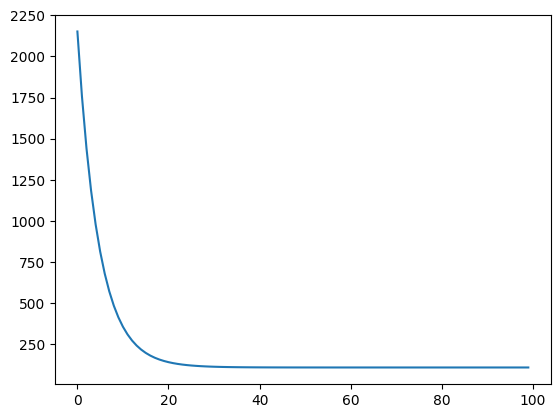

In [12]:
plt.plot(error_list)

In [13]:
def r2_score(Y, Y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = 1-num/denom
    return score*100

In [22]:
y_ = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i], theta)
    y_.append(pred)
    
y_ = np.array(y_)

In [24]:
r2_score(y,y_)

94.8690986210025